In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark

Welcome to JupyROOT 6.26/04


# phi gamma

In [2]:
base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'

phigamma_ccbar = base_file_loc + 'topo/skim_1abinv_phi_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [3]:
base_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0']
tree='phi'

In [4]:
phipi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==1 && iCascDcyBrP_Dst_0!=2'
except_phipi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0!=1 && iCascDcyBrP_Dst_0!=2'
signal_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==2'

In [5]:
pd_phigamma_ccbar_phipi0 = get_pd(file=phigamma_ccbar, tree=tree,base_filter=phipi0_filter,variables=variables)
pd_phigamma_ccbar_remain = get_pd(file=phigamma_ccbar, tree=tree,base_filter=except_phipi0_filter,variables=variables)
pd_phigamma_ccbar_signal = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


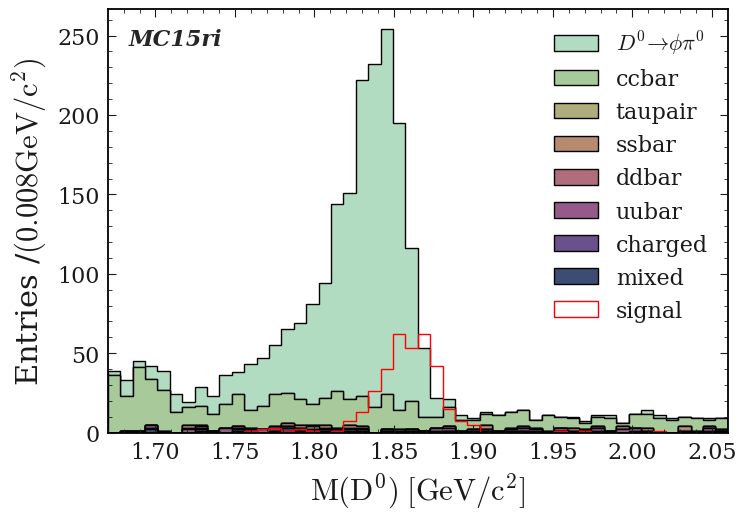

<Figure size 800x550 with 0 Axes>

In [6]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \phi\pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar_remain[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    Vpi0_bkg = {var : pd_phigamma_ccbar_phipi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
    plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

# antiKstar gamma

In [7]:
base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'

Vg_ccbar = base_file_loc + 'topo/skim_1abinv_antiKstar_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
Vg_uubar = base_file_loc + 'uubar/recon_udst_*.root'
Vg_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
Vg_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
Vg_charged = base_file_loc + 'charged/recon_udst_*.root'
Vg_mixed = base_file_loc + 'mixed/recon_udst_*.root'
Vg_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [8]:
base_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0']
tree='antiKstar'

In [9]:
Vpi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==0  || iCascDcyBrP_Dst_0==21 ) && iCascDcyBrP_Dst_0!=14'
except_Vpi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 &&  (iCascDcyBrP_Dst_0!=0  && iCascDcyBrP_Dst_0!=21 ) && iCascDcyBrP_Dst_0!=14'
signal_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==14'

In [10]:
pd_Kg_ccbar_Vpi0 = get_pd(file=Vg_ccbar, tree=tree,base_filter=Vpi0_filter,variables=variables)
pd_Kg_ccbar_remain = get_pd(file=Vg_ccbar, tree=tree,base_filter=except_Vpi0_filter,variables=variables)
pd_Kg_ccbar_signal = get_pd(file=Vg_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_Kg_uubar = get_pd(file=Vg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_ddbar = get_pd(file=Vg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_ssbar = get_pd(file=Vg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_charged = get_pd(file=Vg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_mixed = get_pd(file=Vg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_Kg_taupair = get_pd(file=Vg_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


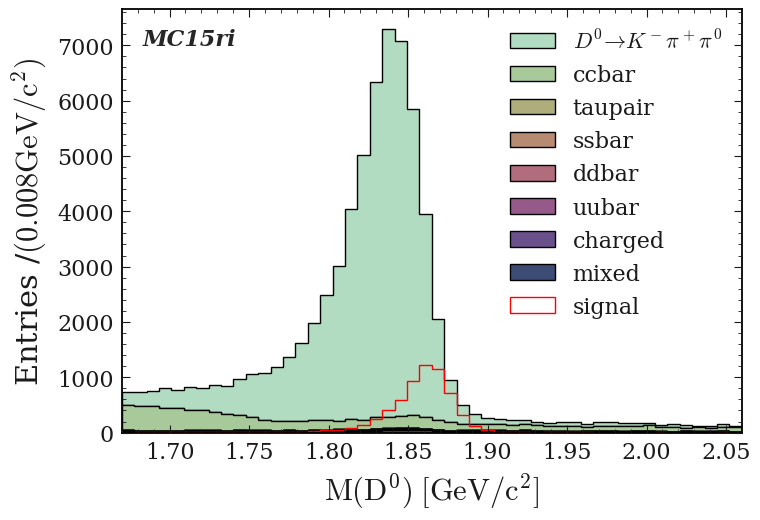

<Figure size 800x550 with 0 Axes>

In [11]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to K^- \pi^+ \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_Kg_mixed[var] }
    charged_bkg = {var : pd_Kg_charged[var] }
    ccbar_bkg = {var : pd_Kg_ccbar_remain[var] }
    uubar_bkg = {var : pd_Kg_uubar[var] }
    ddbar_bkg = {var : pd_Kg_ddbar[var] }
    ssbar_bkg = {var : pd_Kg_ssbar[var] }
    taupair_bkg = {var : pd_Kg_taupair[var] }
    Vpi0_bkg = {var : pd_Kg_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_Kg_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    cut = "Dstarp_CMS_p>2.4 and abs(Dstarp_Q - 0.00593) < 0.0006 and abs(kshort_M - 0.49761)<0.009"
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [12]:
len(Vpi0_bkg[var])

57828

In [13]:
len(Vpi0_bkg[var])

57828

# rho gamma

In [14]:
base_file_loc = '/media/jykim/T7/storage/01_recon/skim_1ab_inv_signal_extraction/'

Vg_ccbar = base_file_loc + 'topo/skim_1abinv_rho_D0_M/topoana.root'
# phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
Vg_uubar = base_file_loc + 'uubar/recon_udst_*.root'
Vg_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
Vg_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
Vg_charged = base_file_loc + 'charged/recon_udst_*.root'
Vg_mixed = base_file_loc + 'mixed/recon_udst_*.root'
Vg_taupair = base_file_loc + 'taupair/recon_udst_*.root'

In [15]:
base_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '
#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '

#gamma_E>0.6 &&
#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','Dstarp_CMS_p','Pi0_Prob']
tree='rho'

In [16]:
Vpi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0==1  || iCascDcyBrP_Dst_0==2 ) && iCascDcyBrP_Dst_0!=117'
except_Vpi0_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0!=1  && iCascDcyBrP_Dst_0!=2 ) && iCascDcyBrP_Dst_0!=117'
signal_filter='Pi0_Prob<0.90 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && iCascDcyBrP_Dst_0==117'

In [17]:
pd_rhog_ccbar_Vpi0 = get_pd(file=Vg_ccbar, tree=tree,base_filter=Vpi0_filter,variables=variables)
pd_rhog_ccbar_remain = get_pd(file=Vg_ccbar, tree=tree,base_filter=except_Vpi0_filter,variables=variables)
pd_rhog_ccbar_signal = get_pd(file=Vg_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_rhog_uubar = get_pd(file=Vg_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_ddbar = get_pd(file=Vg_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_ssbar = get_pd(file=Vg_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_charged = get_pd(file=Vg_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_mixed = get_pd(file=Vg_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_rhog_taupair = get_pd(file=Vg_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


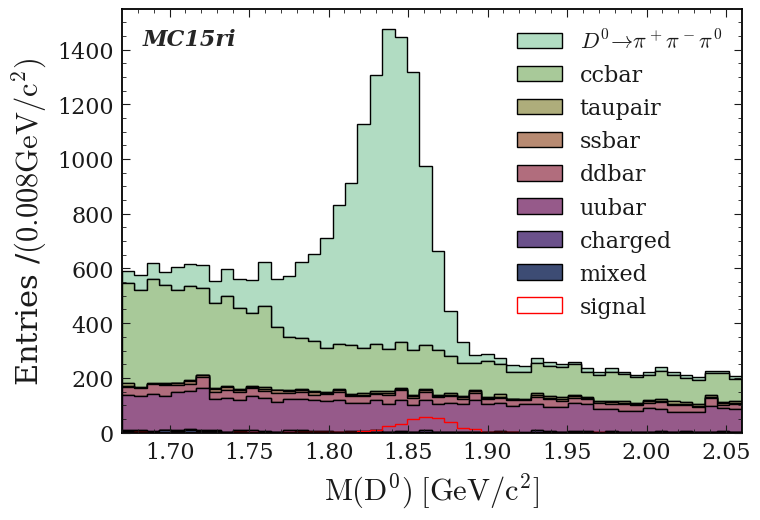

<Figure size 800x550 with 0 Axes>

In [18]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [19]:
len(pd_rhog_ccbar_signal[var])

319

Pi0_Prob


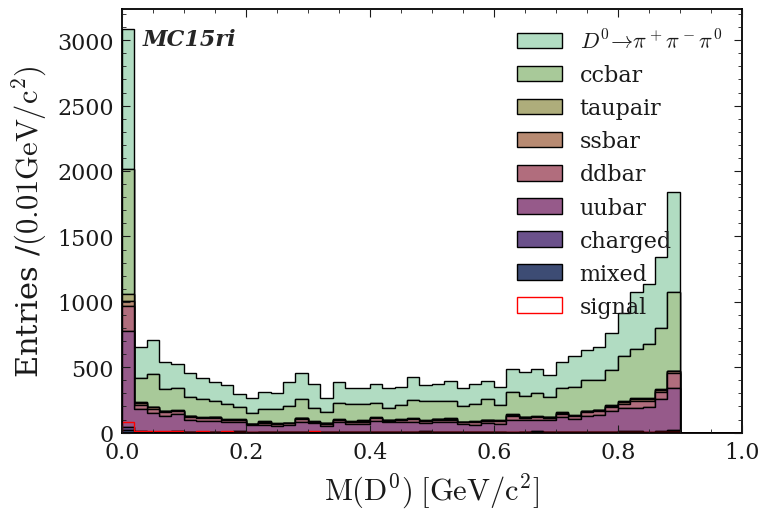

<Figure size 800x550 with 0 Axes>

In [20]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar' ,r'$D^0 \to \pi^+ \pi^- \pi^0$']


colors=b2helix(8)

data_list=dict()
signal_variables = ["Pi0_Prob"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_rhog_mixed[var] }
    charged_bkg = {var : pd_rhog_charged[var] }
    ccbar_bkg = {var : pd_rhog_ccbar_remain[var] }
    uubar_bkg = {var : pd_rhog_uubar[var] }
    ddbar_bkg = {var : pd_rhog_ddbar[var] }
    ssbar_bkg = {var : pd_rhog_ssbar[var] }
    taupair_bkg = {var : pd_rhog_taupair[var] }
    Vpi0_bkg = {var : pd_rhog_ccbar_Vpi0[var] }
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var], Vpi0_bkg[var]]  

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.hist(pd_rhog_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=100, range=xrange)

    ax.set_xlim(xrange[0],xrange[1])
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

###### 

In [21]:
len

<function len(obj, /)>

# omega gamma